In [900]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [901]:
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
np.random.seed(0)
# Filepaths, numpy, and Tensorflow
import os
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [902]:
np.random.seed(1)
SAMPLE_SIZE=1000

In [903]:
df = pd.DataFrame({
                    
"Gender" : np.random.choice(["Male", "Female", "Other"], 
                                                SAMPLE_SIZE, p=[.35,.45,.2]),
"Age": np.random.choice(["18-39", "40-59", "60+"],
                                                SAMPLE_SIZE, p=[.4,.31,.29]),
"Income": np.random.choice(["20,000-49,000", "50,000-69,999", "70,000-89,999", "90,000-109,999", "110,000-129,999", "130,000+"],
                                                SAMPLE_SIZE, p=[.19,.17,.14,.15,.15,.2]),
"Holding Period": np.random.choice(["One Day", "Swing Trader", "Position Trader", "Scalp Trader", "Intraday Trader"], 
                                                   SAMPLE_SIZE, p=[.3,.15,.23,.17,.15]),
"Debt Amount": np.random.choice(["$10,000-49,999", "$50,000-99,999", "100,000-149,999", "$150,000+"],
                                                SAMPLE_SIZE, p=[.15,.23,.27,.35]),
"First Time Investing": np.random.choice(["Yes", "No", "Not sure"],
                                                SAMPLE_SIZE, p=[.45,.35,.2]),
"Credit Score": np.random.choice(["300-629", "630-689", "690-719", "720-850"],
                                                SAMPLE_SIZE, p=[.175,.255,.3,.27]),
"Education Level": np.random.choice(["High School", "Bachelors", "Masters", "PhD"],
                                                SAMPLE_SIZE, p=[.2,.35,.25,.2]),
"Investment Amount": np.random.choice(["$1,000-79,999", "$80,000-149,999", "150,000+"],
                                                SAMPLE_SIZE, p=[.395,.399,.206]),
"Crypto Output": np.random.choice(["0","1","2"], 
                                                SAMPLE_SIZE, p=[0.4,0.18,.42]),
                  })

In [904]:
df.to_csv("crypto_customers.csv")

In [905]:
crypto_df = pd.read_csv(
    Path("./crypto_customers.csv")
)

display(crypto_df.head())
display(crypto_df.tail())

,Unnamed: 0,Gender,Age,Income,Holding Period,Debt Amount,First Time Investing,Credit Score,Education Level,Investment Amount,Crypto Output
0,0,Female,18-39,"90,000-109,999",Scalp Trader,"$50,000-99,999",No,690-719,High School,"$1,000-79,999",0
1,1,Female,60+,"130,000+",One Day,"$150,000+",No,720-850,Bachelors,"$80,000-149,999",1
2,2,Male,60+,"90,000-109,999",One Day,"100,000-149,999",Yes,720-850,High School,"$80,000-149,999",0
3,3,Male,60+,"50,000-69,999",Intraday Trader,"$10,000-49,999",Not sure,630-689,Bachelors,"$80,000-149,999",0
4,4,Male,40-59,"50,000-69,999",Intraday Trader,"$150,000+",Yes,690-719,PhD,"$80,000-149,999",2


,Unnamed: 0,Gender,Age,Income,Holding Period,Debt Amount,First Time Investing,Credit Score,Education Level,Investment Amount,Crypto Output
995,995,Other,40-59,"130,000+",Scalp Trader,"$50,000-99,999",Yes,720-850,Bachelors,"$80,000-149,999",2
996,996,Male,18-39,"50,000-69,999",Swing Trader,"100,000-149,999",Not sure,630-689,Bachelors,"$80,000-149,999",0
997,997,Female,60+,"70,000-89,999",One Day,"$50,000-99,999",Yes,630-689,Masters,"$80,000-149,999",0
998,998,Male,18-39,"20,000-49,000",Position Trader,"$150,000+",Not sure,720-850,Masters,"150,000+",0
999,999,Female,60+,"90,000-109,999",Scalp Trader,"$50,000-99,999",No,720-850,PhD,"$80,000-149,999",2


In [906]:
crypto_df = crypto_df.drop(columns=["Unnamed: 0"])

In [907]:
crypto_df = crypto_df.dropna()

In [908]:
crypto_df.dtypes

Gender                  object
Age                     object
Income                  object
Holding Period          object
Debt Amount             object
First Time Investing    object
Credit Score            object
Education Level         object
Investment Amount       object
Crypto Output            int64
dtype: object

In [909]:
categorical_variable = list(crypto_df.dtypes[crypto_df.dtypes == "object"].index)

categorical_variable

['Gender',
 'Age',
 'Income',
 'Holding Period',
 'Debt Amount',
 'First Time Investing',
 'Credit Score',
 'Education Level',
 'Investment Amount']

In [910]:
enc = OneHotEncoder(sparse=False)

In [911]:
crypto_df[categorical_variable]

,Gender,Age,Income,Holding Period,Debt Amount,First Time Investing,Credit Score,Education Level,Investment Amount
0,Female,18-39,"90,000-109,999",Scalp Trader,"$50,000-99,999",No,690-719,High School,"$1,000-79,999"
1,Female,60+,"130,000+",One Day,"$150,000+",No,720-850,Bachelors,"$80,000-149,999"
2,Male,60+,"90,000-109,999",One Day,"100,000-149,999",Yes,720-850,High School,"$80,000-149,999"
3,Male,60+,"50,000-69,999",Intraday Trader,"$10,000-49,999",Not sure,630-689,Bachelors,"$80,000-149,999"
4,Male,40-59,"50,000-69,999",Intraday Trader,"$150,000+",Yes,690-719,PhD,"$80,000-149,999"
...,...,...,...,...,...,...,...,...,...
995,Other,40-59,"130,000+",Scalp Trader,"$50,000-99,999",Yes,720-850,Bachelors,"$80,000-149,999"
996,Male,18-39,"50,000-69,999",Swing Trader,"100,000-149,999",Not sure,630-689,Bachelors,"$80,000-149,999"
997,Female,60+,"70,000-89,999",One Day,"$50,000-99,999",Yes,630-689,Masters,"$80,000-149,999"
998,Male,18-39,"20,000-49,000",Position Trader,"$150,000+",Not sure,720-850,Masters,"150,000+"


In [912]:
encoded_data = enc.fit_transform(crypto_df[categorical_variable])

In [913]:
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variable)
)

display(encoded_df.head())

,Gender_Female,Gender_Male,Gender_Other,Age_18-39,Age_40-59,Age_60+,"Income_110,000-129,999","Income_130,000+","Income_20,000-49,000","Income_50,000-69,999",...,Credit Score_630-689,Credit Score_690-719,Credit Score_720-850,Education Level_Bachelors,Education Level_High School,Education Level_Masters,Education Level_PhD,"Investment Amount_$1,000-79,999","Investment Amount_$80,000-149,999","Investment Amount_150,000+"
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [914]:
encoded_df = pd.concat([
    crypto_df.drop(columns=categorical_variable),
    encoded_df,
], axis=1)

encoded_df.head()

,Crypto Output,Gender_Female,Gender_Male,Gender_Other,Age_18-39,Age_40-59,Age_60+,"Income_110,000-129,999","Income_130,000+","Income_20,000-49,000",...,Credit Score_630-689,Credit Score_690-719,Credit Score_720-850,Education Level_Bachelors,Education Level_High School,Education Level_Masters,Education Level_PhD,"Investment Amount_$1,000-79,999","Investment Amount_$80,000-149,999","Investment Amount_150,000+"
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [915]:
y = encoded_df["Crypto Output"]

y[:5]

0    0
1    1
2    0
3    0
4    2
Name: Crypto Output, dtype: int64

In [916]:
X = encoded_df.drop(columns=["Crypto Output"])

display(X.head())
display(X.tail())

,Gender_Female,Gender_Male,Gender_Other,Age_18-39,Age_40-59,Age_60+,"Income_110,000-129,999","Income_130,000+","Income_20,000-49,000","Income_50,000-69,999",...,Credit Score_630-689,Credit Score_690-719,Credit Score_720-850,Education Level_Bachelors,Education Level_High School,Education Level_Masters,Education Level_PhD,"Investment Amount_$1,000-79,999","Investment Amount_$80,000-149,999","Investment Amount_150,000+"
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,Gender_Female,Gender_Male,Gender_Other,Age_18-39,Age_40-59,Age_60+,"Income_110,000-129,999","Income_130,000+","Income_20,000-49,000","Income_50,000-69,999",...,Credit Score_630-689,Credit Score_690-719,Credit Score_720-850,Education Level_Bachelors,Education Level_High School,Education Level_Masters,Education Level_PhD,"Investment Amount_$1,000-79,999","Investment Amount_$80,000-149,999","Investment Amount_150,000+"
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [917]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [918]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [919]:
X_train.shape, y_train.shape

((750, 35), (750,))

In [920]:
y_train[:20]

298    0
160    0
268    2
658    2
996    0
641    2
906    1
805    2
893    2
389    2
121    2
837    1
187    0
16     2
773    0
493    0
341    1
426    0
467    1
106    0
Name: Crypto Output, dtype: int64

In [921]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [922]:
y_train.shape

(750, 10)

In [923]:
model=Sequential()

In [924]:
X_train.shape[1]

35

In [925]:
# We can also choose our activation function. `relu` is a common
model.add(Dense(input_dim=X_train.shape[1], units=30, activation='relu'))

In [926]:
# Add a second hidden layer
model.add(Dense(units=20, activation='relu'))

In [927]:
# Add our final output layer where the number of nodes
# corresponds to the number of y labels
model.add(Dense(units=num_classes, activation='softmax'))

In [928]:
# We can summarize our model
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 30)                1080      
_________________________________________________________________
dense_85 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                210       
Total params: 1,910
Trainable params: 1,910
Non-trainable params: 0
_________________________________________________________________


In [929]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [930]:
y_train.shape

(750, 10)

In [931]:
X_train.shape

(750, 35)

In [932]:
fit_model = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 650us/step - loss: 2.0730 - accuracy: 0.2733
Epoch 2/100
24/24 [==============================] - 0s 520us/step - loss: 1.6431 - accuracy: 0.3880
Epoch 3/100
24/24 [==============================] - 0s 564us/step - loss: 1.2985 - accuracy: 0.4333
Epoch 4/100
24/24 [==============================] - 0s 520us/step - loss: 1.1450 - accuracy: 0.4360
Epoch 5/100
24/24 [==============================] - 0s 607us/step - loss: 1.0863 - accuracy: 0.4533
Epoch 6/100
24/24 [==============================] - 0s 520us/step - loss: 1.0587 - accuracy: 0.4773
Epoch 7/100
24/24 [==============================] - 0s 520us/step - loss: 1.0426 - accuracy: 0.4787
Epoch 8/100
24/24 [==============================] - 0s 564us/step - loss: 1.0321 - accuracy: 0.4867
Epoch 9/100
24/24 [==============================] - 0s 520us/step - loss: 1.0206 - accuracy: 0.4747
Epoch 10/100
24/24 [==============================] - 0s 520us/step - loss: 1.0165 - accura

In [933]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 1.4527 - accuracy: 0.3640
Loss: 1.452731966972351, Accuracy: 0.36399999260902405


<AxesSubplot:>

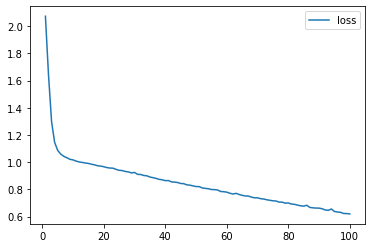

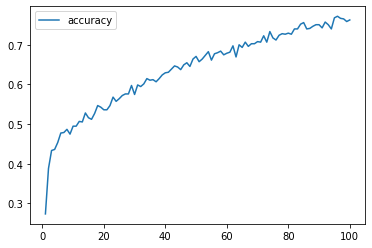

In [934]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")